In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from PIL import Image
from pycocotools.coco import COCO

In [15]:
IMAGES_DIR=Path("/data/datasets/tdt17/RDD2022/ALL/images/")
ANNOTATIONS_TRAIN_PATH="/data/other/mathiawo/RDD2022_COCO/annotations/train.json"
ANNOTATIONS_VAL_PATH="/data/other/mathiawo/RDD2022_COCO/annotations/val.json"

In [16]:
coco = COCO(ANNOTATIONS_TRAIN_PATH)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [17]:
categories = coco.loadCats(coco.getCatIds())
print(categories)

[{'supercategory': 'none', 'id': 1, 'name': 'D00'}, {'supercategory': 'none', 'id': 2, 'name': 'D10'}, {'supercategory': 'none', 'id': 3, 'name': 'D20'}, {'supercategory': 'none', 'id': 4, 'name': 'D40'}]


In [18]:
images = coco.loadImgs(coco.getImgIds())

In [21]:
coco_image = images[0]
image_path = IMAGES_DIR / coco_image["file_name"]
print(image_path)

/data/datasets/tdt17/RDD2022/ALL/images/China_Drone_000937.jpg


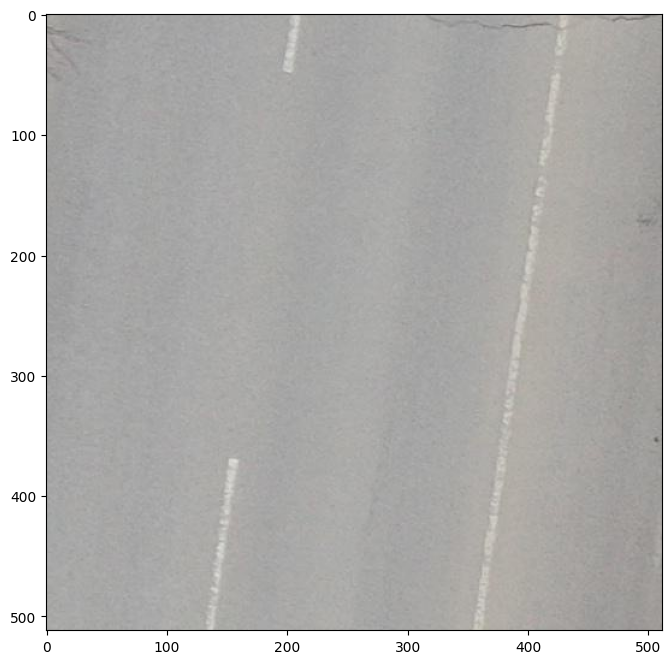

In [22]:
image = Image.open(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(image)

In [23]:
annotations_ids = coco.getAnnIds(imgIds=[coco_image["id"]])
annotations = coco.loadAnns(annotations_ids)

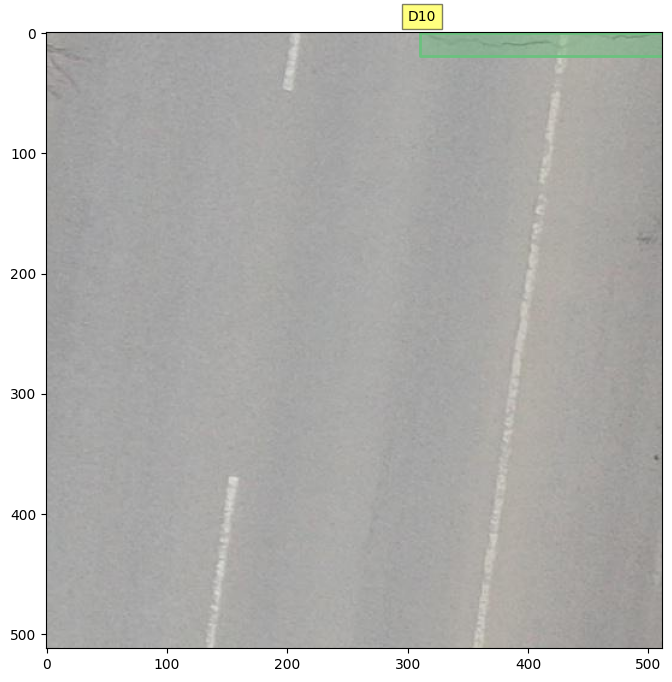

In [24]:
plt.figure(figsize=(8, 8))
plt.imshow(image)
coco.showAnns(annotations, draw_bbox=True)


def category_id_to_name(category_id):
    for category in categories:
        if category["id"] == category_id:
            return category["name"]
    return "unknown"


# show title
for annotation in annotations:
    plt.text(
        annotation["bbox"][0] - 10,
        annotation["bbox"][1] - 10,
        category_id_to_name(annotation["category_id"]),
        bbox=dict(facecolor="yellow", alpha=0.5),
    )
